In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import seaborn as sns

import sklearn
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

import helpers

# Opening the dataset

In [2]:
df = pd.read_csv("dielectron.csv")
df.dropna(inplace=True) # To remove rows with na values from the dataset
data = df.values
df.head()

Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920   1  15.89300  
2 -2.455080  2.148570   1  38.38770  
3  2.330210  0.565865  -1   3.72862  
4 -2.423700 -1.684810  -1   2.74718

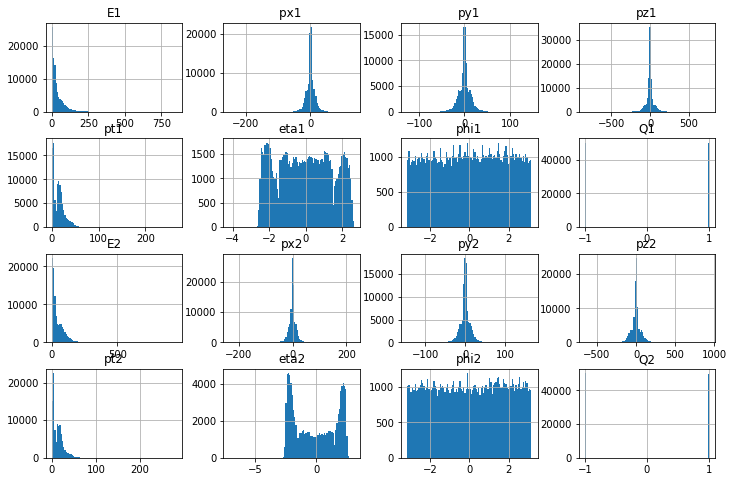

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]

# df.hist(bins=100);
dftest = df.drop(columns=["Run", "Event", "M"]);
dftest.hist(bins=100);

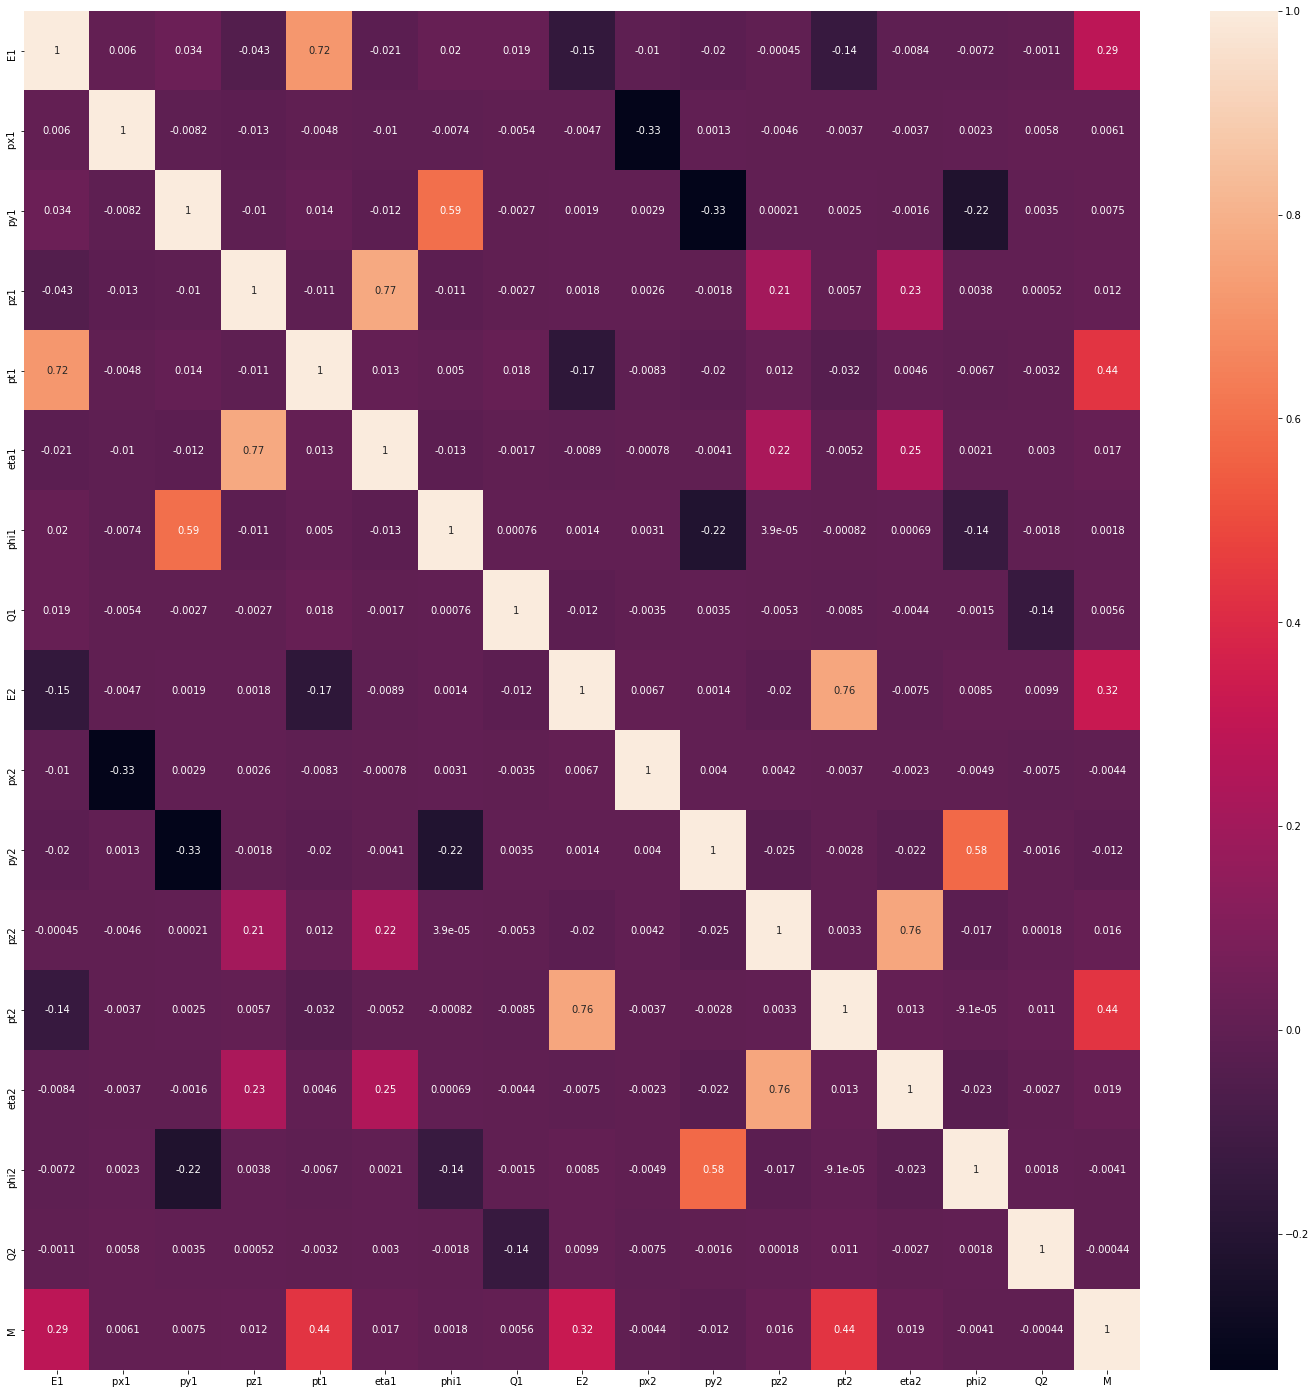

In [5]:
plt.rcParams['figure.figsize'] = [25, 25]
dftest = df.drop(columns=["Run", "Event"]);

sb.heatmap(dftest.corr(),annot = True);

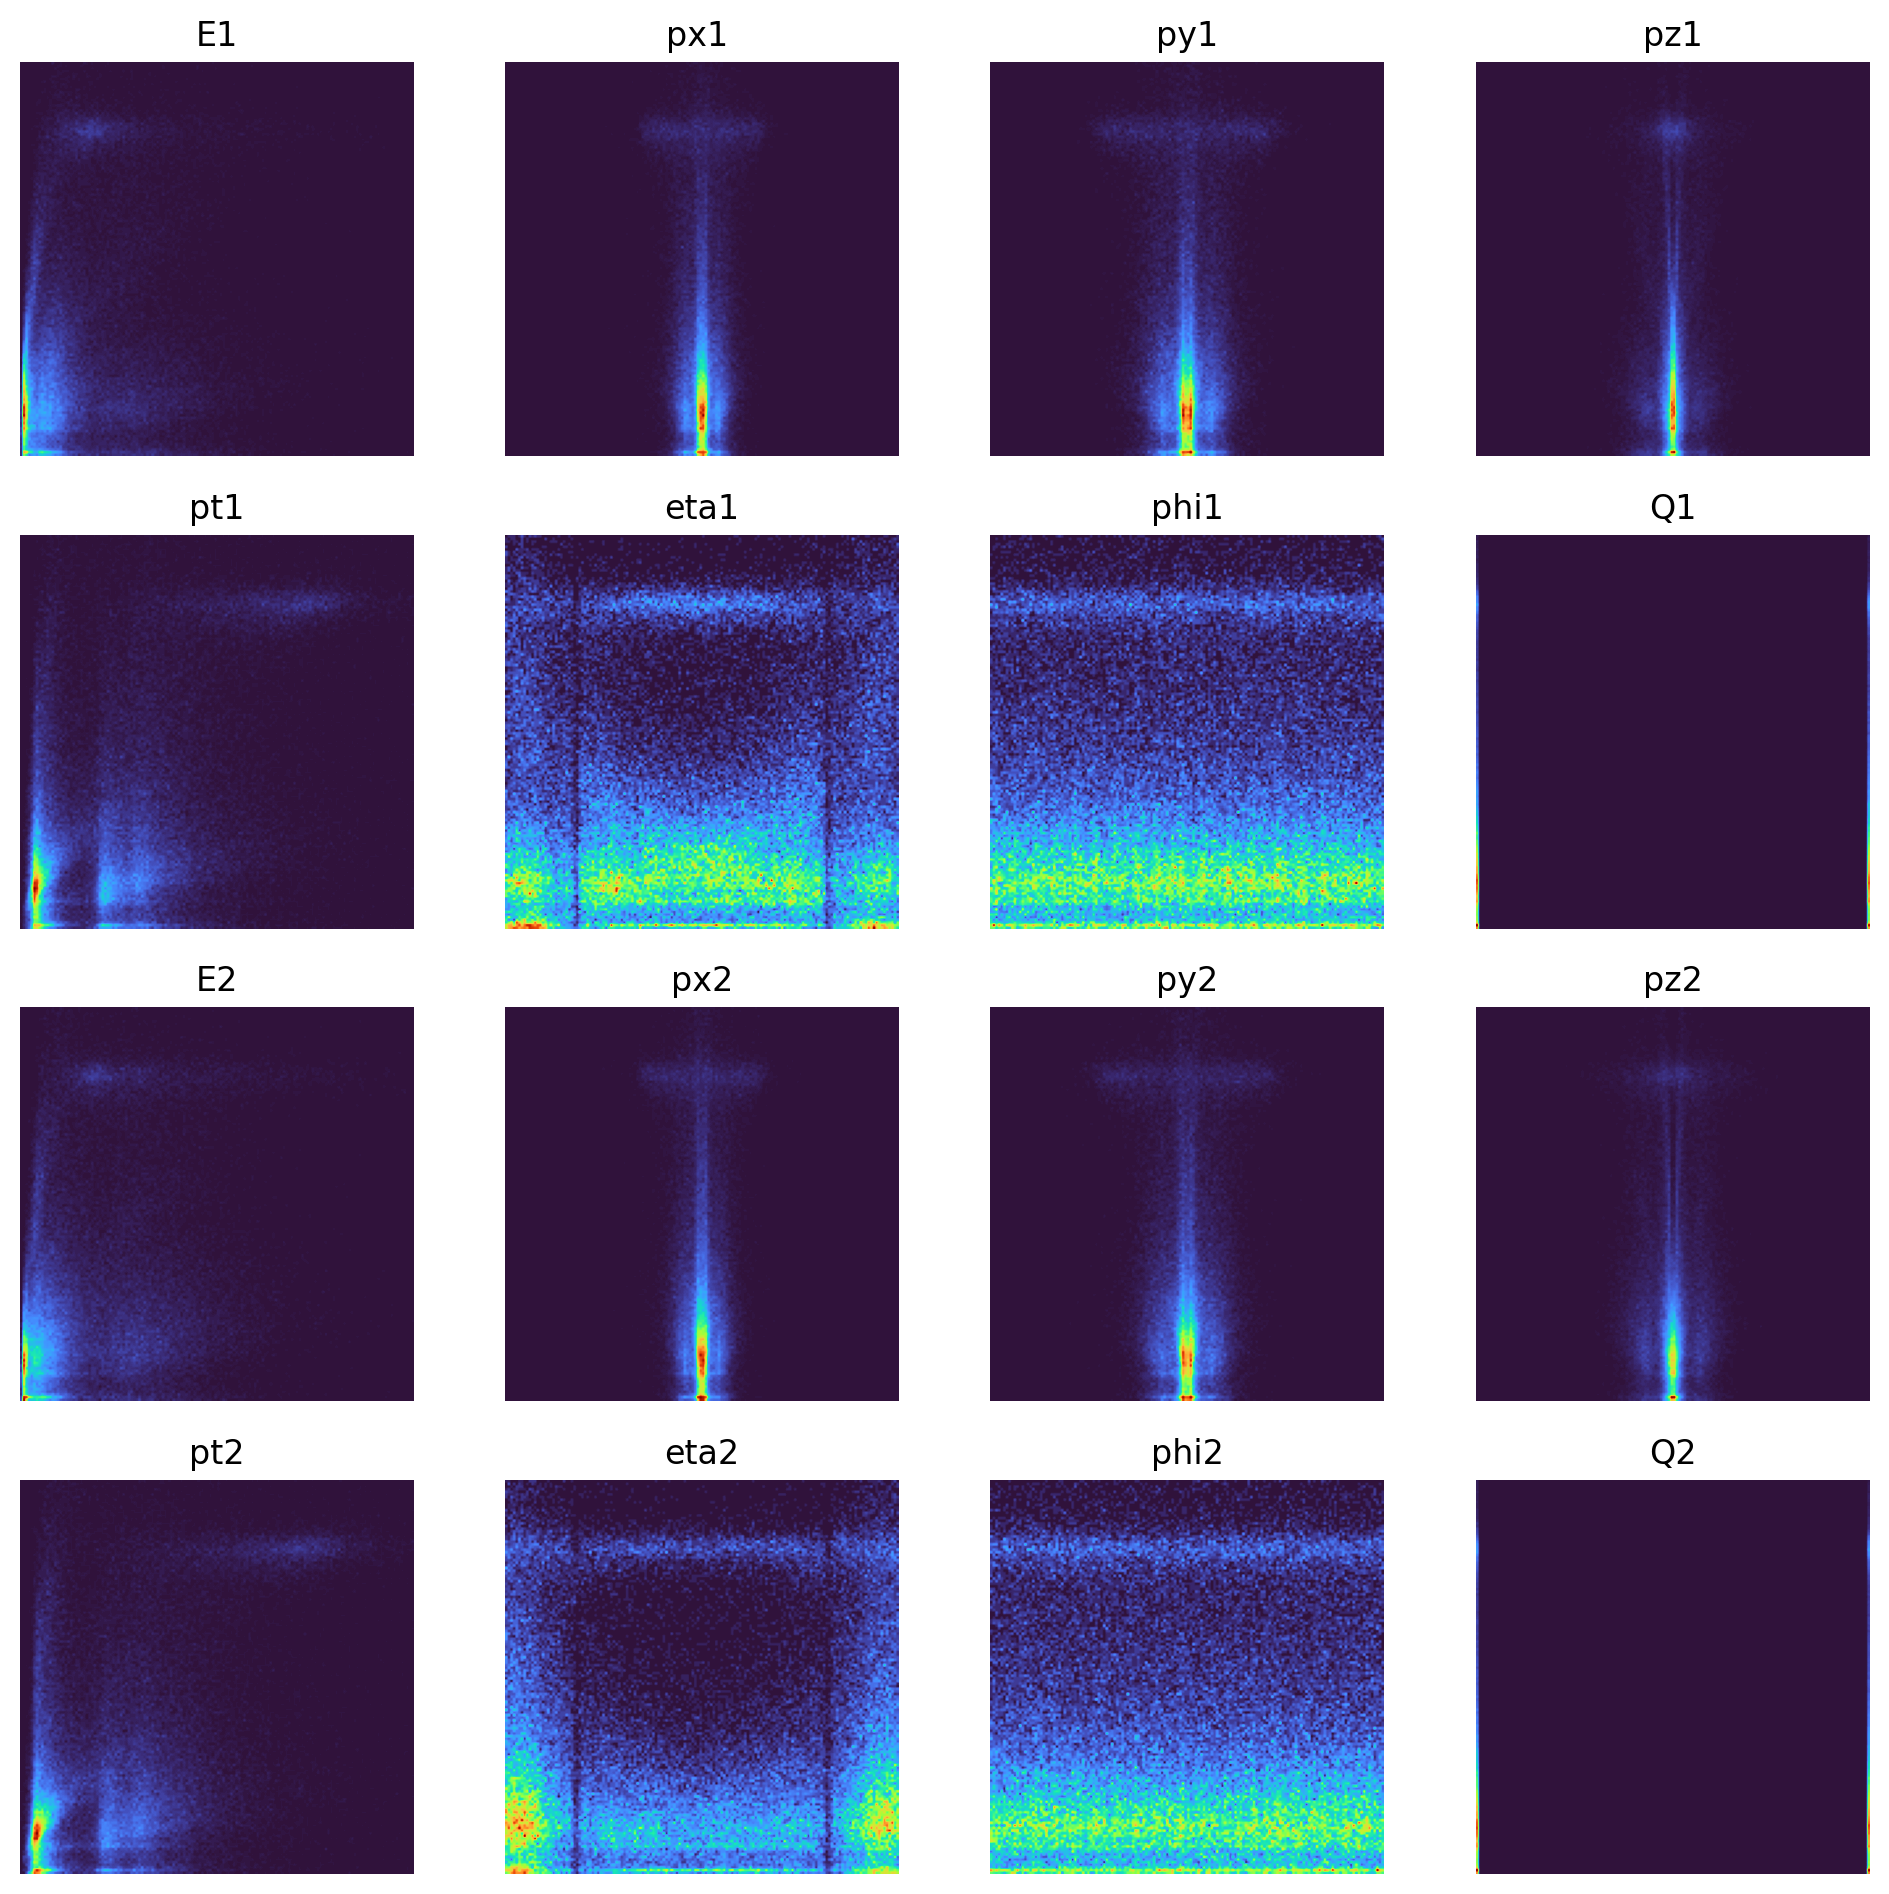

In [8]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 200
columns = df.columns[2:18].values
x_lim = [[0, 250], [-150, 150],[-100, 100], [-500, 500],
        [0, 60], [-3.14 / 4 * 3, 3.14 / 4 * 3], [], [],
        [0, 250], [-150 , 150], [-100, 100], [-500 , 500],
        [0, 60], [-3.14 / 4 * 3, 3.14 / 4 * 3], [], []]
for i in range(0, 16):
    plt.subplot(4, 4, i + 1);
    helpers.heatmap(df[f"{columns[i]}"].values, df["M"].values, title=columns[i], x_lim =x_lim[i]);
    

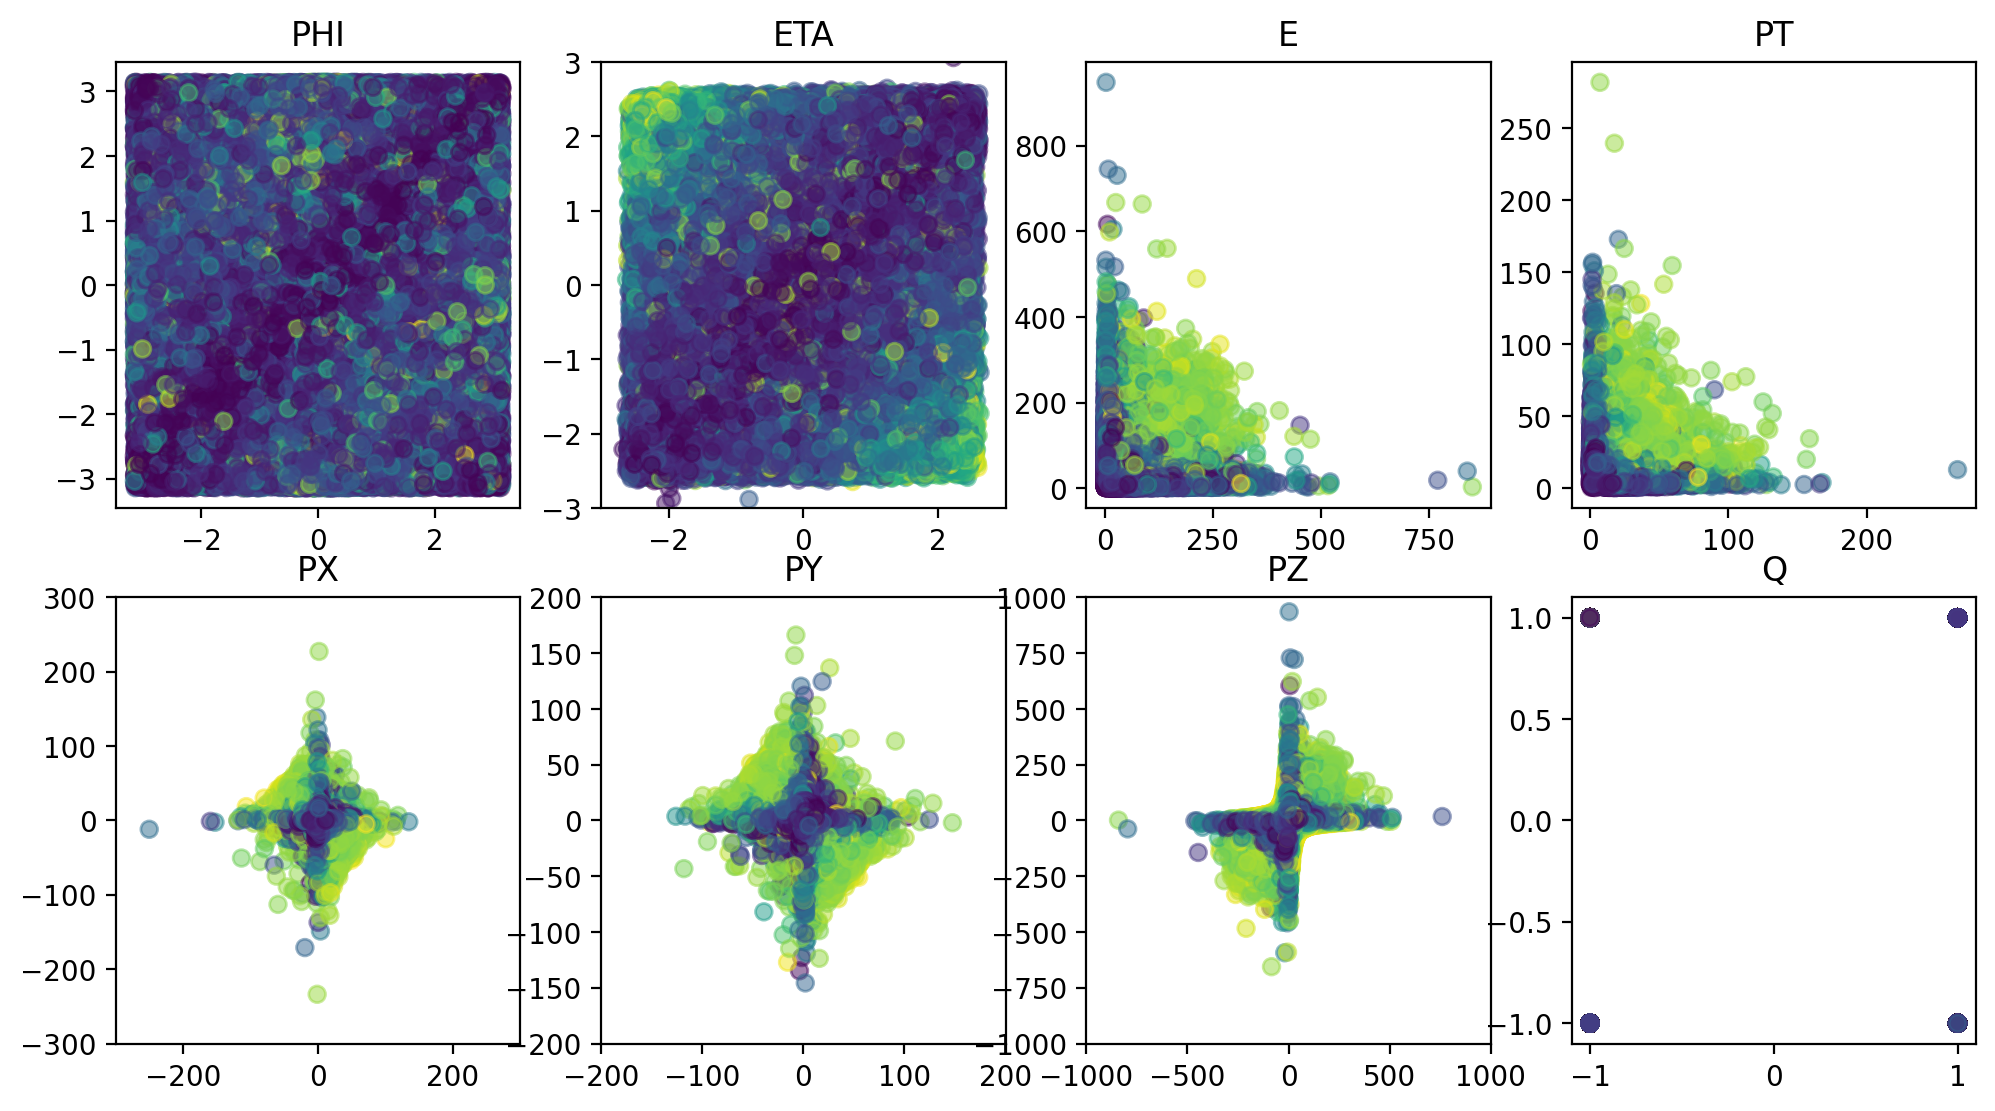

In [3]:
plt.rcParams['figure.figsize'] = [12, 6.5]
plt.rcParams['figure.dpi'] = 200
df_features = df[['phi1' , 'phi2', 'Q1', 'Q2', 'px1 ','px2', 'py1', 'py2', "pz1", "pz2",'pt1', 'pt2', 'E1', 'E2', "eta1", "eta2"]]

plt.subplot(2, 4, 1)
plt.title("PHI")
plt.scatter(df["phi1"].values,df["phi2"].values,  c=df["M"].values , alpha = 0.5)

plt.subplot(2, 4, 2)
plt.title("ETA")
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.scatter(df["eta1"].values,df["eta2"].values,  c=df["M"].values , alpha = 0.5)

plt.subplot(2, 4, 3)
plt.title("E")
plt.scatter(df["E1"].values,df["E2"].values,  c=df["M"].values , alpha = 0.5)

plt.subplot(2, 4, 4)
plt.title("PT")
plt.scatter(df["pt1"].values,df["pt2"].values,  c=df["M"].values , alpha = 0.5)

plt.subplot(2, 4, 5)
plt.title("PX")
plt.xlim([-300, 300])
plt.ylim([-300, 300])
plt.scatter(df["px1 "].values,df["px2"].values,  c=df["M"].values , alpha = 0.5)

plt.subplot(2, 4, 6)
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.title("PY")
plt.scatter(df["py1"].values,df["py2"].values,  c=df["M"].values , alpha = 0.5)

plt.subplot(2, 4, 7)
plt.xlim([-1000, 1000])
plt.ylim([-1000, 1000])
plt.title("PZ")
plt.scatter(df["pz1"].values,df["pz2"].values,  c=df["M"].values , alpha = 0.5)

plt.subplot(2, 4, 8)
plt.title("Q")
plt.scatter(df["Q1"].values,df["Q2"].values,  c=df["M"].values , alpha = 0.5)

print("")

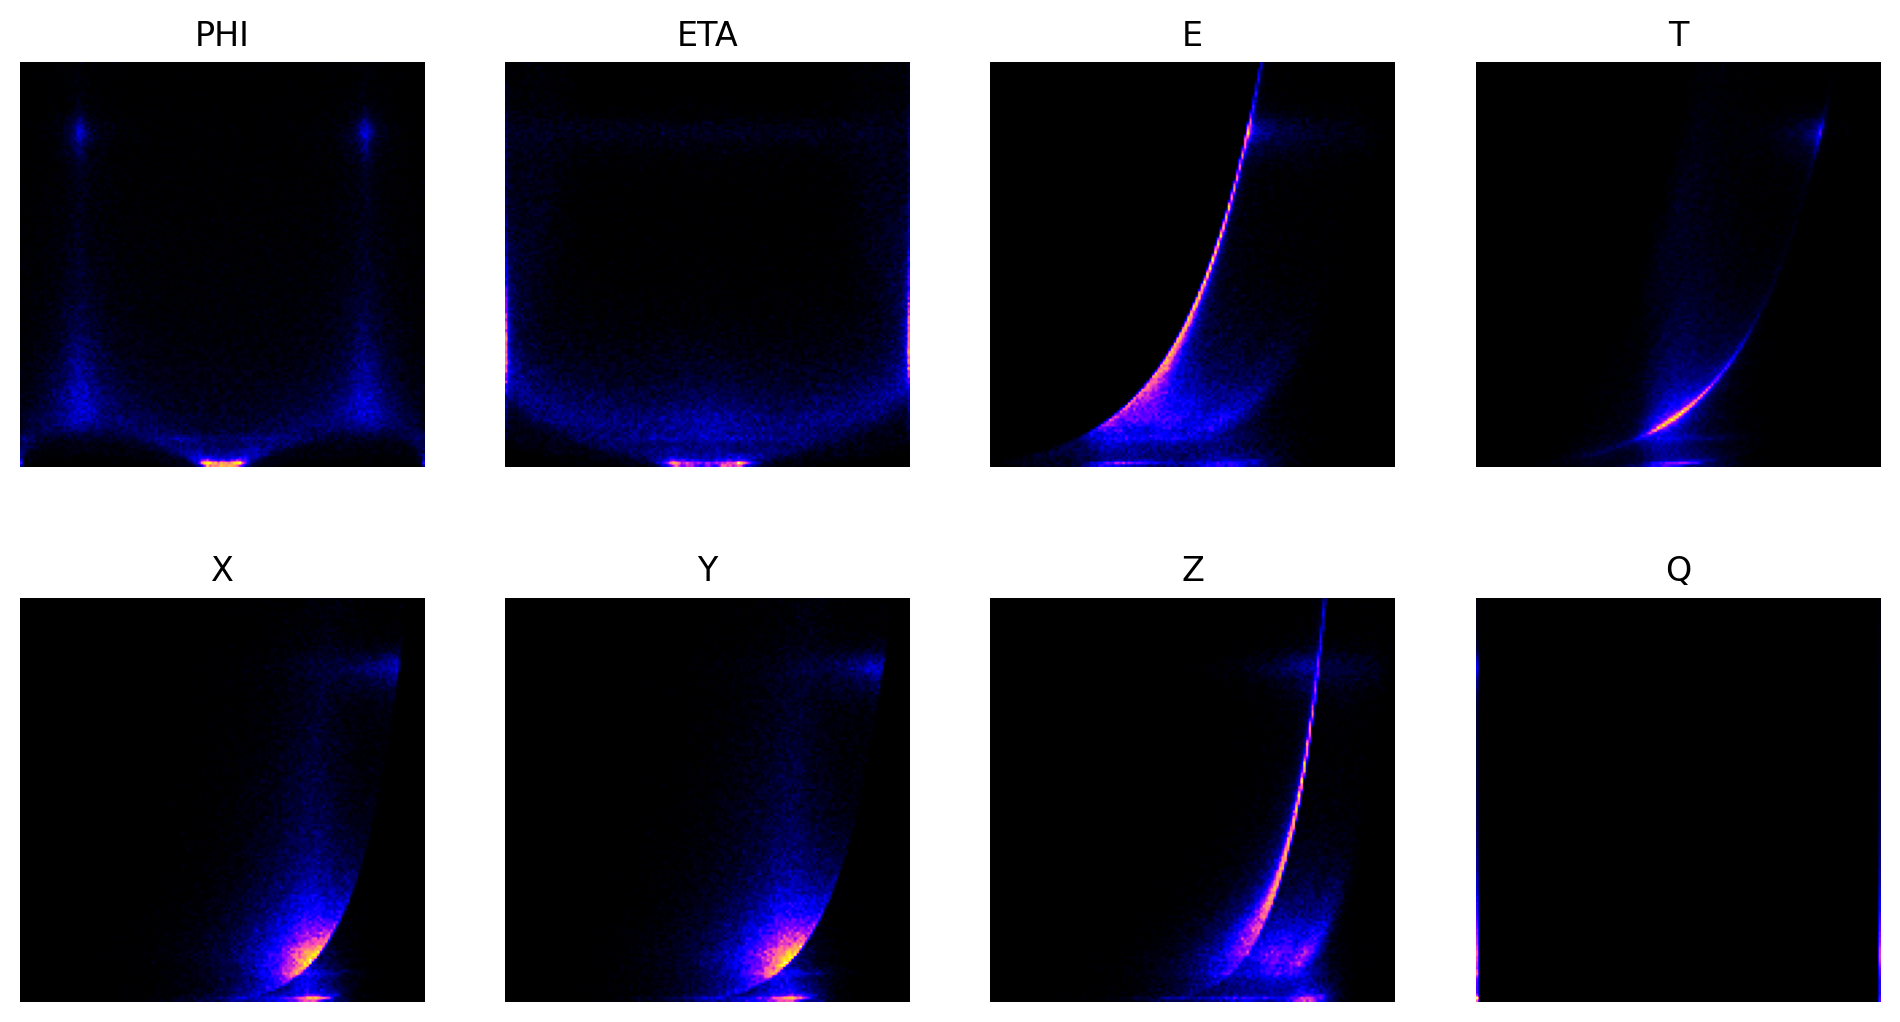

In [185]:
plt.rcParams['figure.figsize'] = [12, 6.5]
plt.rcParams['figure.dpi'] = 200

plt.subplot(2, 4, 1)
helpers.heatmap(np.sin((df["phi1"].values - df["phi2"].values)/4) , df["M"].values)
plt.title("PHI");

plt.subplot(2, 4, 2)
helpers.heatmap(np.sin((df["eta1"].values - df["eta2"].values)/2) , df["M"].values)
plt.title("ETA");

plt.subplot(2, 4, 3)
helpers.heatmap(df["E1"].values * df["E2"].values, df["M"].values, log_space=True)
plt.title("E")

plt.subplot(2, 4, 4)
helpers.heatmap(df["pt1"].values * df["pt2"].values, df["M"].values, log_space=True)
plt.title("T")

plt.subplot(2, 4, 5)
helpers.heatmap(np.power(df["px1 "].values, 2) * np.power(df["px2"].values, 2), df["M"].values, log_space=True)
plt.title("X");

plt.subplot(2, 4, 6)
helpers.heatmap(np.power(df["py1"].values,2) * np.power(df["py2"].values, 2), df["M"].values, log_space=True)
plt.title("Y")

plt.subplot(2, 4, 7)
helpers.heatmap(np.power(df["pz1"].values,2) * np.power(df["pz2"].values, 2), df["M"].values, log_space=True)
plt.title("Z")

plt.subplot(2, 4, 8)
helpers.heatmap(df["Q1"].values * df["Q2"].values, df["M"].values)
plt.title("Q");


# Preprocessing, extracting features, scaling and spliting to train, test, validation
In this phase, we process the dataset in two ways, training using the real features extracted from the csv file and feature engineering.


In [9]:
X = data[:, 2:18]
y = data[:, 18]

print(f"Shape of the data: {X.shape}")

data_scaler_std  = X.std(axis=0)
data_scaler_mean = X.mean(axis=0)

scaler = preprocessing.StandardScaler()
scaler.mean_ = data_scaler_mean
scaler.scale_ = data_scaler_std
X = scaler.transform(X)

#Train, Test and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

X_engineered = np.zeros([X.shape[0],X.shape[1] + 8 ]) # We are adding 8 more features.
X_engineered[:, :X.shape[1]] = X;
X_engineered[:, X.shape[1] + 0] = X[:, 0] * X[:, 8];              # E
X_engineered[:, X.shape[1] + 1] = np.power(X[:, 1], 2) * np.power(X[:,  9], 2); #x
X_engineered[:, X.shape[1] + 2] = np.power(X[:, 2], 2) * np.power(X[:, 10], 2); #y
X_engineered[:, X.shape[1] + 3] = np.power(X[:, 3], 2) * np.power(X[:, 11], 2); #z
X_engineered[:, X.shape[1] + 4] = X[:, 4] * X[:, 12];             # t
X_engineered[:, X.shape[1] + 5] = np.sin((X[:, 5] - X[:, 13])/2); # Eta
X_engineered[:, X.shape[1] + 6] = np.cos((X[:, 6] - X[:, 14])/4); # Phi
X_engineered[:, X.shape[1] + 7] = X[:, 7] * X[:, 15];             # Q

#Train, Test and validation
X_engineered_train, X_engineered_test, y_engineered_train, y_engineered_test = train_test_split(X_engineered, y, test_size=0.2, random_state=42)
# X_engineered_train, X_engineered_val, y_engineered_train, y_engineered_val   = train_test_split(X_engineered_train, y_engineered_train, test_size=0.33, random_state=42)
print(f"Shape of the data after adding engineered features: {X_engineered.shape}")

feature_names = np.concatenate((np.array(df.columns[2:18].values), ["fe_E", "fe_X", "fe_Y", "fe_Z", "fe_T", "fe_ETA", "fe_PHI", "fe_Q"]));

Shape of the data: (99915, 16)
Shape of the data after adding engineered features: (99915, 24)


# Dimensionality Reduction and feature engineering


In [10]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=3).fit_transform(X, y)
X_embedded.shape


(99915, 3)

In [21]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=8, n_iter=200, random_state=42).fit_transform(X, y)
svd.shape


(99915, 8)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8).fit_transform(X)
pca.shape


(99915, 8)

In [33]:
EPOCHS = 40
BATCH_SIZE = 64
LEARNING_RATE = 0.001

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Running on: {device}")


class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=16, out_features=32
        )
        self.encoder_output_layer = nn.Linear(
            in_features=32, out_features=8
        )
        self.encoder_output_layer_2 = nn.Linear(
            in_features=8, out_features=2
        )        
        self.decoder_hidden_layer_2 = nn.Linear(
            in_features=2, out_features=16
        )        
        self.decoder_hidden_layer = nn.Linear(
            in_features=16, out_features=8
        )
        self.decoder_output_layer = nn.Linear(
            in_features=8, out_features=1
        )

    def forward(self, features):
        activation = torch.relu(self.encoder_hidden_layer(features))
        
        code = torch.relu(self.encoder_output_layer(activation))
        code = torch.relu(self.encoder_output_layer_2(code))
        
        activation = torch.relu(self.decoder_hidden_layer_2(code))
        activation = torch.relu(self.decoder_hidden_layer(activation))
        reconstructed = torch.relu(self.decoder_output_layer(activation))
        return reconstructed , code
        

class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset =   RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset =  RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())  

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)


#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE().to(device)

print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

Running on: cuda:0
AE(
  (encoder_hidden_layer): Linear(in_features=16, out_features=32, bias=True)
  (encoder_output_layer): Linear(in_features=32, out_features=8, bias=True)
  (encoder_output_layer_2): Linear(in_features=8, out_features=2, bias=True)
  (decoder_hidden_layer_2): Linear(in_features=2, out_features=16, bias=True)
  (decoder_hidden_layer): Linear(in_features=16, out_features=8, bias=True)
  (decoder_output_layer): Linear(in_features=8, out_features=1, bias=True)
)


In [34]:
print("Begin training.")

loss_stats = {
    'train': [],
    "val": []
}

for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred , _ = model(X_train_batch)
        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred , _ = model(X_val_batch)
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')

Begin training.


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 853.80409 | Val Loss: 129.13679
Epoch 002: | Train Loss: 71.74886 | Val Loss: 42.12232
Epoch 003: | Train Loss: 34.54865 | Val Loss: 29.98315
Epoch 004: | Train Loss: 26.33315 | Val Loss: 23.00251
Epoch 005: | Train Loss: 20.82542 | Val Loss: 20.47634
Epoch 006: | Train Loss: 18.16403 | Val Loss: 16.61897
Epoch 007: | Train Loss: 15.75772 | Val Loss: 15.00936
Epoch 008: | Train Loss: 14.07072 | Val Loss: 13.55486
Epoch 009: | Train Loss: 12.45517 | Val Loss: 12.44968
Epoch 010: | Train Loss: 11.08767 | Val Loss: 10.54583
Epoch 011: | Train Loss: 9.89545 | Val Loss: 10.31659
Epoch 012: | Train Loss: 9.33763 | Val Loss: 10.10925
Epoch 013: | Train Loss: 8.54752 | Val Loss: 8.25805
Epoch 014: | Train Loss: 8.05575 | Val Loss: 8.09030
Epoch 015: | Train Loss: 7.61819 | Val Loss: 8.03058
Epoch 016: | Train Loss: 7.25689 | Val Loss: 7.51390
Epoch 017: | Train Loss: 7.15280 | Val Loss: 7.27175
Epoch 018: | Train Loss: 6.89016 | Val Loss: 7.15606
Epoch 019: | Train Los

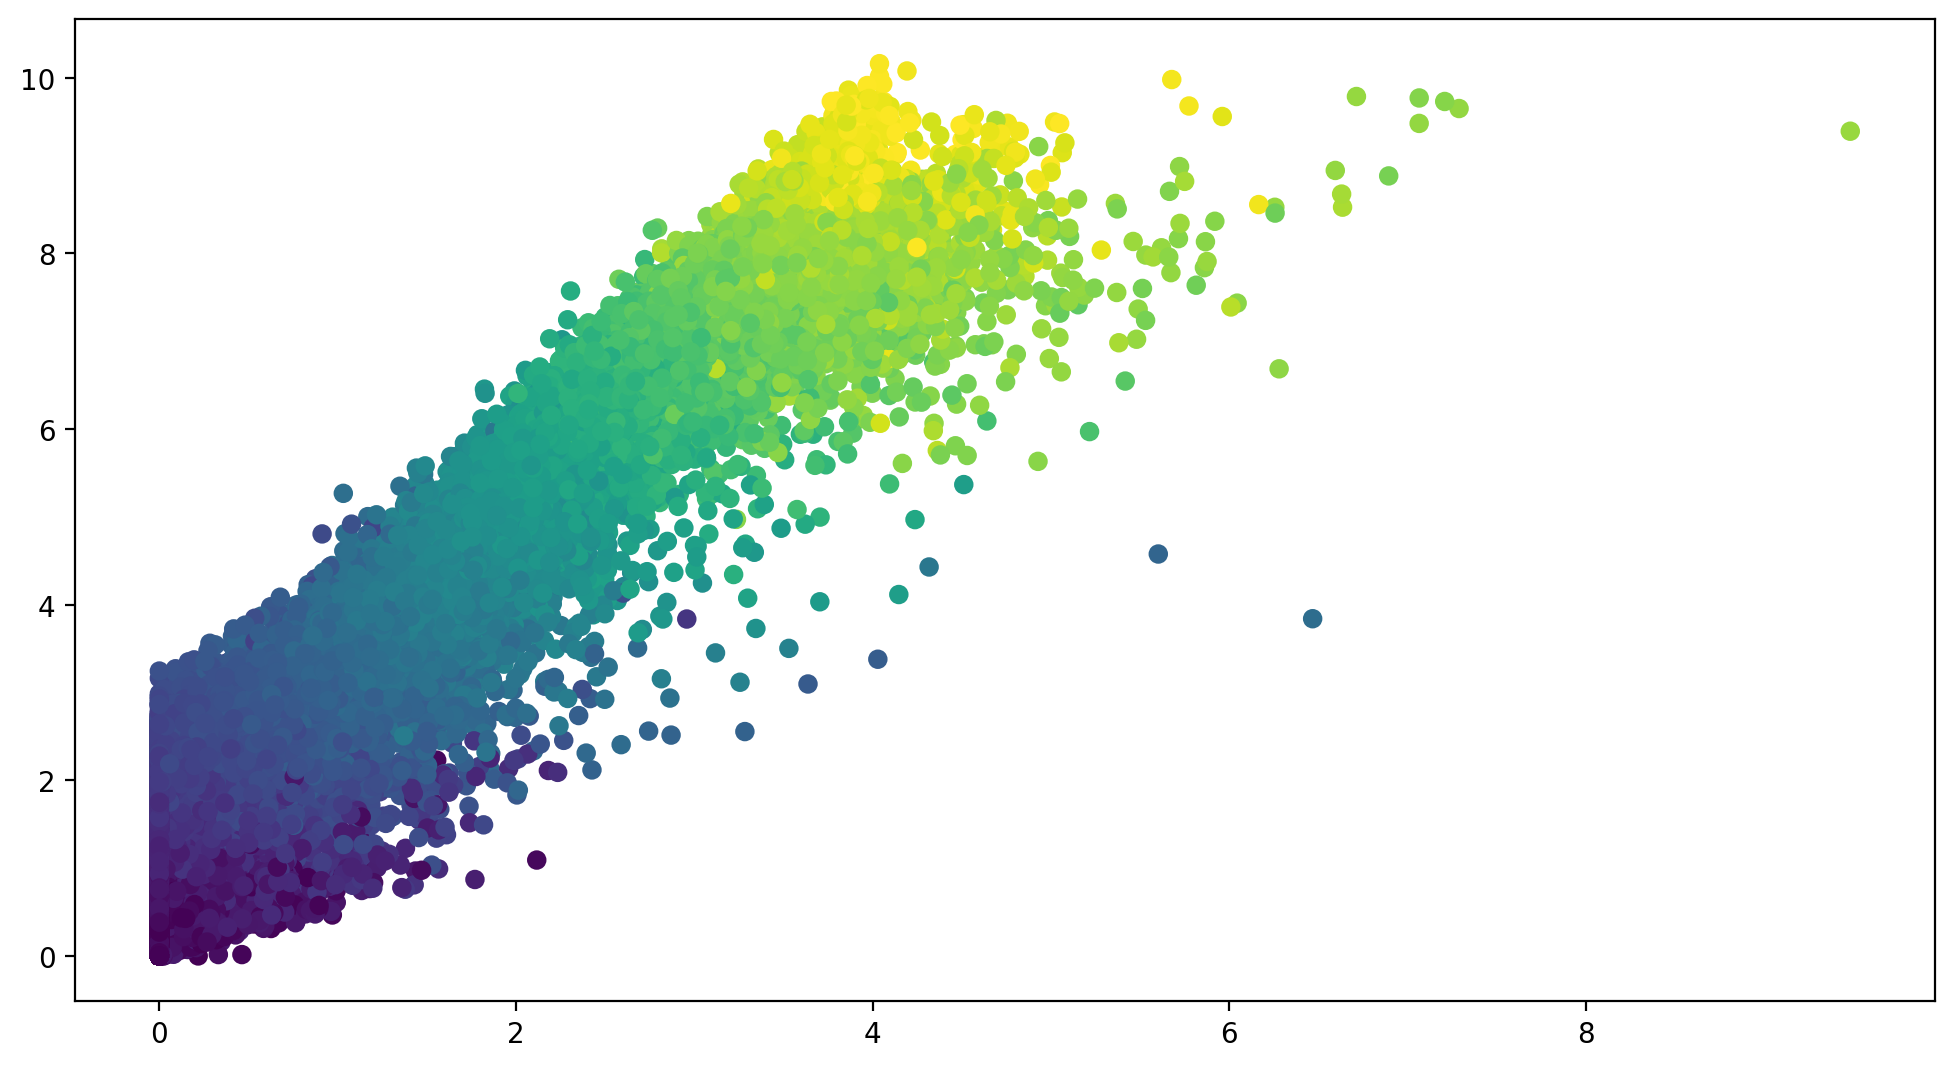

In [42]:
model.cpu()
_, reduced = model(torch.Tensor(X))
red = reduced.detach().numpy()
plt.scatter(red[:, 0], red[:, 1] , c=y)

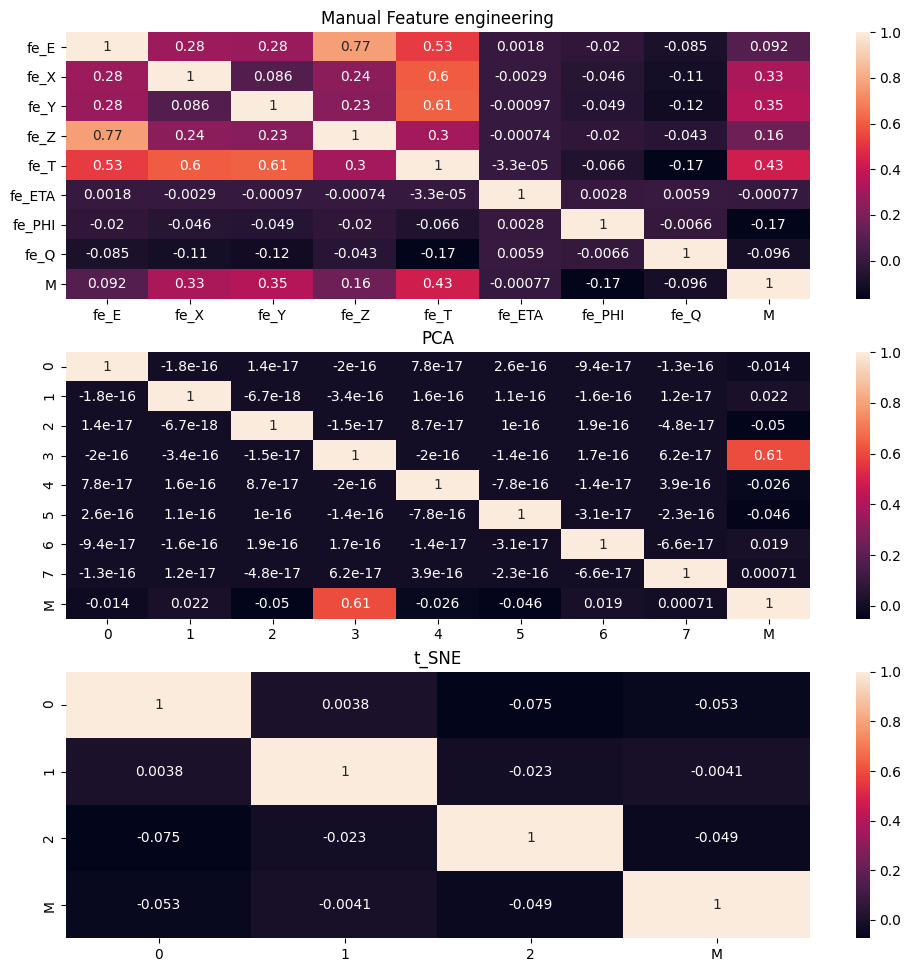

In [35]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12, 12]

plt.subplot(3, 1, 1)
plt.title("Manual Feature engineering")
df2 = pd.DataFrame(X_engineered[:, 16:24], columns = ["fe_E", "fe_X", "fe_Y", "fe_Z", "fe_T", "fe_ETA", "fe_PHI", "fe_Q"])
df2["M"] = y;
sb.heatmap(df2.corr(method="pearson"),annot = True);



plt.subplot(3, 1, 2)
plt.title("PCA")
df2 = pd.DataFrame(pca)
df2["M"] = y;
sb.heatmap(df2.corr(method="pearson"),annot = True);

plt.subplot(3, 1, 3)
plt.title("t_SNE")
df2 = pd.DataFrame(X_embedded)
df2["M"] = y;
sb.heatmap(df2.corr(method="pearson"),annot = True);


# Modeling the system

In [12]:
kf = KFold(n_splits=5);

## Linear Regressor

In [13]:
whole_perf = []
for train_index, test_index in kf.split(X_train):
    lin_model, perf = helpers.linear_regressor(X_train[train_index], y_train[train_index], X_train[test_index], y_train[test_index]);
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)
print("=== After feature engineering ===")
whole_perf = []
for train_index, test_index in kf.split(X_train):
    lin_model_eng, perf = helpers.linear_regressor(X_engineered_train[train_index], y_engineered_train[train_index], X_engineered_train[test_index], y_engineered_train[test_index]);
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)

R_2: 0.40 ±0.01
MSE: 14.19 ±0.04
MAE: 379.68 ±2.14
=== After feature engineering ===
R_2: 0.46 ±0.00
MSE: 13.44 ±0.06
MAE: 344.73 ±1.84


## Polynomial Regressor

In [ ]:
whole_perf = []
for train_index, test_index in kf.split(X_train):
    poly_model, polyfit, perf = helpers.polynomial_regressor(X_train[train_index], y_train[train_index], X_train[test_index], y_train[test_index], degree=4);
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)
print("=== After feature engineering ===")
whole_perf = []
for train_index, test_index in kf.split(X_train):
    poly_model_eng, polyfit_eng, perf = helpers.polynomial_regressor(X_engineered_train[train_index], y_engineered_train[train_index], X_engineered_train[test_index], y_engineered_train[test_index], degree=4);
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)

# poly_model, polyfit = helpers.polynomial_regressor(X_train, y_train, X_val, y_val, degree=4);
# print("===")
# poly_model_eng, polyfit_eng = helpers.polynomial_regressor(X_engineered_train, y_engineered_train, X_engineered_val, y_engineered_val, degree=2);

R_2: -2.41 ±6.17
MSE: 1.27 ±0.32
MAE: 2157.54 ±3904.80
=== After feature engineering ===


## Lasso Regressor

In [8]:
whole_perf = []
for train_index, test_index in kf.split(X_train):
    lasso_model, perf = helpers.lasso_regressor(X_train[train_index], y_train[train_index], X_train[test_index], y_train[test_index], alpha=0.1);
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)
print("=== After feature engineering ===")
whole_perf = []
for train_index, test_index in kf.split(X_train):
    lasso_model_eng, perf = helpers.lasso_regressor(X_engineered_train[train_index], y_engineered_train[train_index], X_engineered_train[test_index], y_engineered_train[test_index], alpha=0.1);
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)

R_2: 0.40 ±0.01
MSE: 14.21 ±0.04
MAE: 379.64 ±2.06
=== After feature engineering ===
R_2: 0.45 ±0.01
MSE: 13.53 ±0.06
MAE: 347.97 ±1.93


## SGD Regressor

In [9]:
whole_perf = []
for train_index, test_index in kf.split(X_train):
    sgd_model, perf = helpers.sgd_regressor(X_train[train_index], y_train[train_index], X_train[test_index], y_train[test_index], max_iter=10000, tol=0.1)
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)
print("=== After feature engineering ===")
whole_perf = []
for train_index, test_index in kf.split(X_train):
    sgd_model_eng, perf = helpers.sgd_regressor(X_engineered_train[train_index], y_engineered_train[train_index], X_engineered_train[test_index], y_engineered_train[test_index], max_iter=10000, tol=0.1)
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)

R_2: 0.40 ±0.01
MSE: 14.23 ±0.08
MAE: 380.79 ±2.04
=== After feature engineering ===
R_2: -521536318585595494400.00 ±420009973281654636544.00
MSE: 60726937470.83 ±21416290686.89
MAE: 332523075923265447788544.00 ±267756650215530280517632.00


## SVM SVR Regressor

In [14]:
whole_perf = []
for train_index, test_index in kf.split(X_train):
    svr_model, perf = helpers.svr_regressor(X_train[train_index], y_train[train_index], X_train[test_index], y_train[test_index]);
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)
print("=== After feature engineering ===")
whole_perf = []
for train_index, test_index in kf.split(X_train):
    svr_model_eng, perf = helpers.svr_regressor(X_engineered_train[train_index], y_engineered_train[train_index], X_engineered_train[test_index], y_engineered_train[test_index]);
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)

# randforest_model = helpers.random_forest_regressor(X_train, y_train, X_val, y_val)
importances = list(randforest_model.feature_importances_ * 100);
# randforest_model_eng = helpers.random_forest_regressor(X_engineered_train, y_engineered_train, X_engineered_val, y_engineered_val)
importances_engineered = list(randforest_model_eng.feature_importances_ * 100);


R_2: 0.96 ±0.00
MSE: 2.92 ±0.01
MAE: 27.76 ±0.50
=== After feature engineering ===
R_2: 0.49 ±0.01
MSE: 11.52 ±0.06
MAE: 323.91 ±2.11


## Random Forest Regressor

In [11]:
whole_perf = []
for train_index, test_index in kf.split(X_train):
    randforest_model, perf = helpers.random_forest_regressor(X_train[train_index], y_train[train_index], X_train[test_index], y_train[test_index]);
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)
print("=== After feature engineering ===")
whole_perf = []
for train_index, test_index in kf.split(X_train):
    randforest_model_eng, perf = helpers.random_forest_regressor(X_engineered_train[train_index], y_engineered_train[train_index], X_engineered_train[test_index], y_engineered_train[test_index]);
    whole_perf.append(perf)
helpers.calculate_performance(whole_perf)

# randforest_model = helpers.random_forest_regressor(X_train, y_train, X_val, y_val)
importances = list(randforest_model.feature_importances_ * 100);
# randforest_model_eng = helpers.random_forest_regressor(X_engineered_train, y_engineered_train, X_engineered_val, y_engineered_val)
importances_engineered = list(randforest_model_eng.feature_importances_ * 100);


R_2: 0.94 ±0.00
MSE: 4.11 ±0.05
MAE: 36.65 ±1.18
=== After feature engineering ===
R_2: 0.99 ±0.00
MSE: 1.22 ±0.01
MAE: 4.62 ±0.14
===


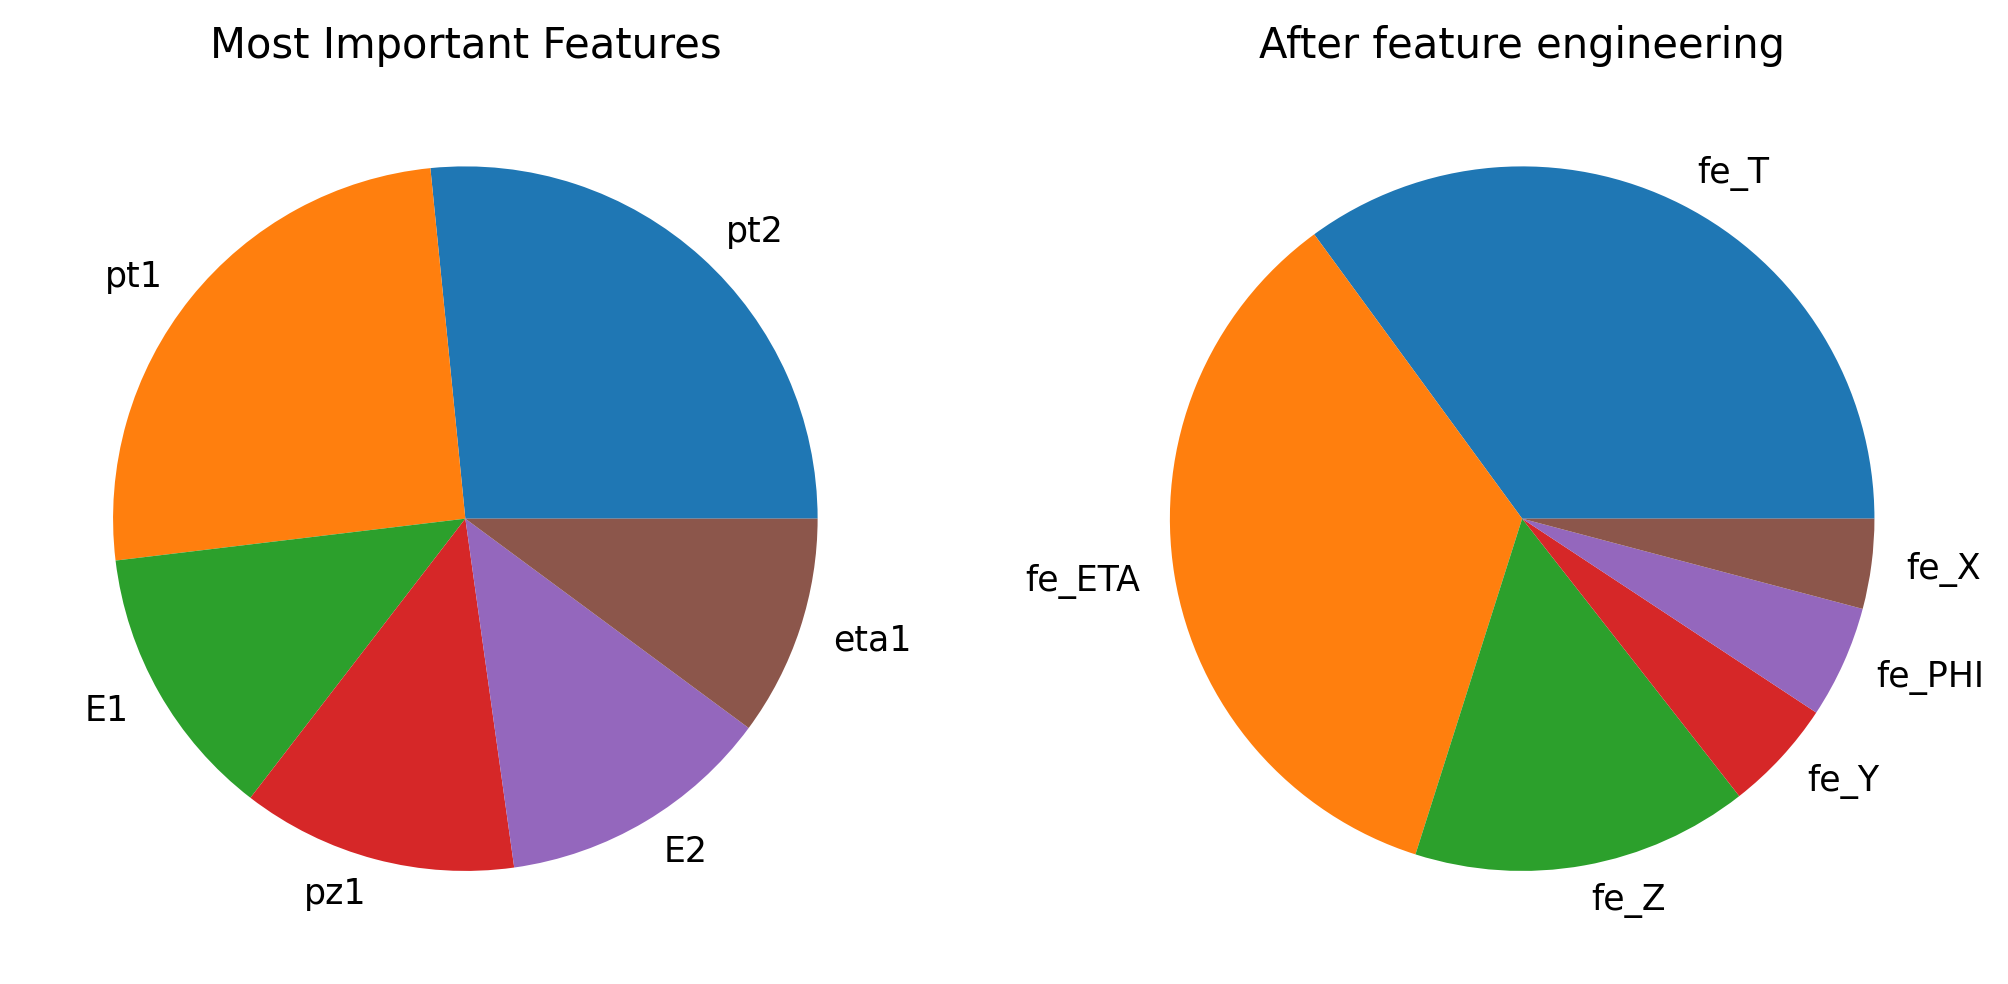

In [12]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 250

feature_importances_engineered = [[feature, round(importance, 0)] for feature, importance in zip(feature_names, importances_engineered)]
# Sort the feature importances by most important first
feature_importances_engineered = np.array(sorted(feature_importances_engineered, key = lambda x: x[1], reverse = True))

feature_importances = [[feature, round(importance, 0)] for feature, importance in zip(feature_names[:16], importances)]
# Sort the feature importances by most important first
feature_importances = np.array(sorted(feature_importances, key = lambda x: x[1], reverse = True))

plt.subplot(1, 2, 1);
plt.title("Most Important Features");
plt.pie(feature_importances[:6, 1], labels = feature_importances[:6, 0]);
plt.subplot(1, 2, 2);
plt.title("After feature engineering");
plt.pie(feature_importances_engineered[:6, 1], labels = feature_importances_engineered[:6, 0]);



It seems like the random forest regressor with R squared value of 0.94 and MAE of 4.14 compared to the mean of y which is 29, is a reliable and valid model. By extracing the most important features such as pt, E, pz, etc,  we can increase the R_2 and MAE about 1% and 2% respectively.

## Neural Network Regressor

In [39]:
whole_perf = []
losses = []

for train_index, test_index in kf.split(X_train):
    nn_model, loss, perf = helpers.neural_network_regressor(X_train[train_index], y_train[train_index], X_train[test_index], y_train[test_index], epochs= 40);
    whole_perf.append(perf)
    losses.append(loss)
helpers.calculate_performance(whole_perf)

# nn_model = helpers.neural_network_regressor(X_train, y_train, X_test, y_test, X_val, y_val, epochs= 150)

Running on: cuda:0
NN_Regressor(
  (hid1): Linear(in_features=16, out_features=32, bias=True)
  (hid2): Linear(in_features=32, out_features=10, bias=True)
  (oupt): Linear(in_features=10, out_features=1, bias=True)
)
Begin training.


  0%|          | 0/40 [00:00<?, ?it/s]

Running on: cuda:0
NN_Regressor(
  (hid1): Linear(in_features=16, out_features=32, bias=True)
  (hid2): Linear(in_features=32, out_features=10, bias=True)
  (oupt): Linear(in_features=10, out_features=1, bias=True)
)
Begin training.


  0%|          | 0/40 [00:00<?, ?it/s]

Running on: cuda:0
NN_Regressor(
  (hid1): Linear(in_features=16, out_features=32, bias=True)
  (hid2): Linear(in_features=32, out_features=10, bias=True)
  (oupt): Linear(in_features=10, out_features=1, bias=True)
)
Begin training.


  0%|          | 0/40 [00:00<?, ?it/s]

Running on: cuda:0
NN_Regressor(
  (hid1): Linear(in_features=16, out_features=32, bias=True)
  (hid2): Linear(in_features=32, out_features=10, bias=True)
  (oupt): Linear(in_features=10, out_features=1, bias=True)
)
Begin training.


  0%|          | 0/40 [00:00<?, ?it/s]

Running on: cuda:0
NN_Regressor(
  (hid1): Linear(in_features=16, out_features=32, bias=True)
  (hid2): Linear(in_features=32, out_features=10, bias=True)
  (oupt): Linear(in_features=10, out_features=1, bias=True)
)
Begin training.


  0%|          | 0/40 [00:00<?, ?it/s]

R_2: 1.00 ±0.00
MSE: 0.05 ±0.00
MAE: 0.00 ±0.00


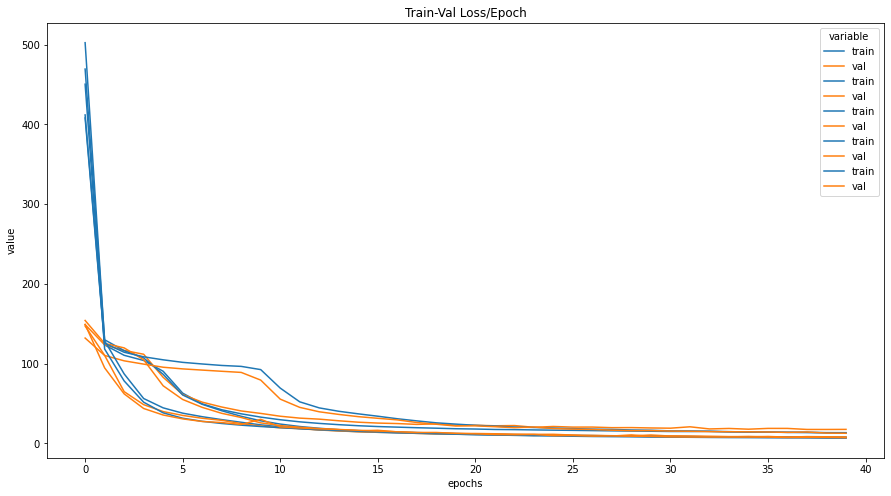

In [40]:
plt.figure(figsize=(15,8))

for i in range(5):
    sns.lineplot(data=losses[i], x = "epochs", y="value", hue="variable")
plt.title("Train-Val Loss/Epoch");

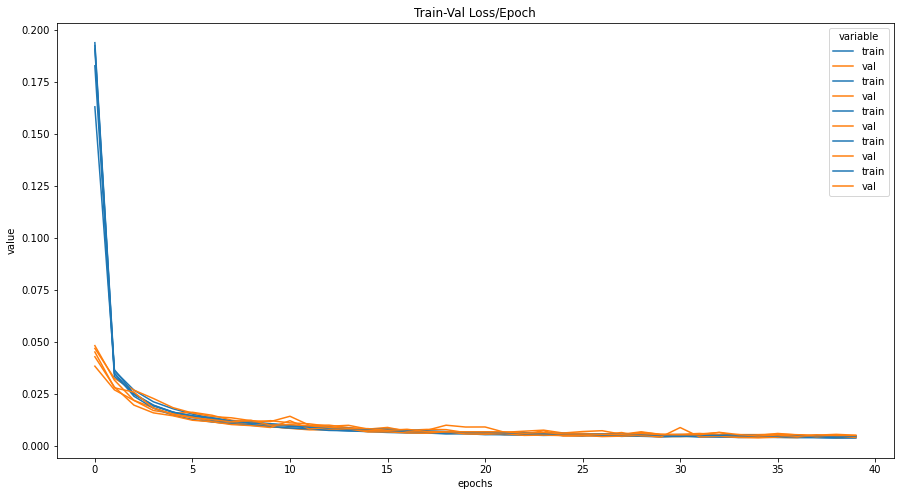

In [40]:
plt.figure(figsize=(15,8))

for i in range(5):
    sns.lineplot(data=losses[i], x = "epochs", y="value", hue="variable")
plt.title("Train-Val Loss/Epoch");

### Checking the performance of the top three models

In [48]:
svr_out = svr_model.predict(X_test);
nn_out = nn_model(torch.Tensor(X_test)).detach().numpy();
forest_out = randforest_model_eng.predict(X_engineered_test);

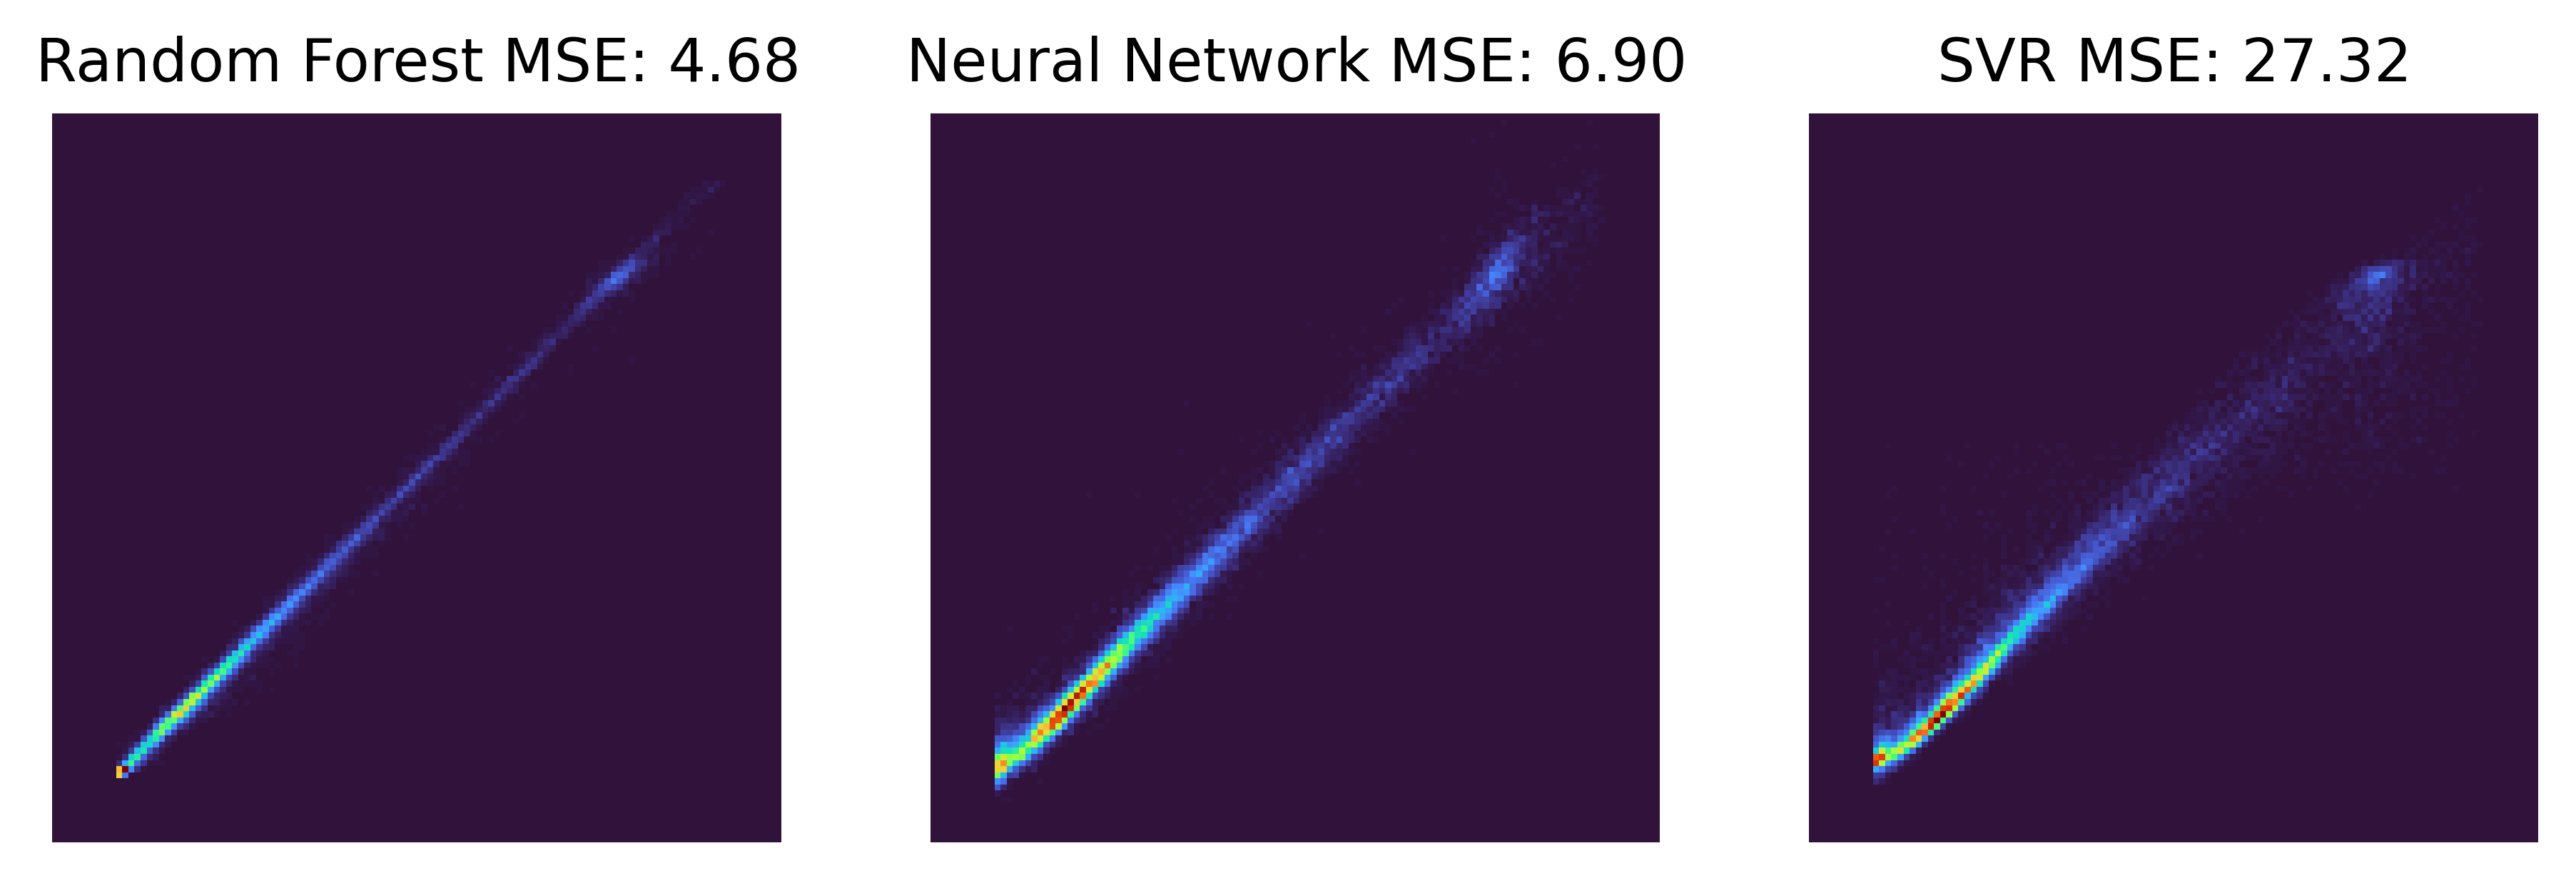

In [92]:
plt.rcParams['figure.figsize'] = [9, 3]
plt.rcParams['figure.dpi'] = 500
plt.subplot(1, 3, 1)
plt.xlim([0, 120])
plt.ylim([0, 120])
helpers.heatmap(y_test, forest_out, title=f"Random Forest MSE: {metrics.mean_squared_error(y_test, forest_out):0.2f}", bin_num = 120, x_lim=[-10, 120], y_lim=[-10, 120], reverse=False);

plt.subplot(1, 3, 2)
plt.xlim([0, 120])
plt.ylim([0, 120])
helpers.heatmap(y_test, nn_out.squeeze(), title=f"Neural Network MSE: {metrics.mean_squared_error(y_test, nn_out.squeeze()):0.2f}", bin_num = 120, x_lim=[-10, 120], y_lim=[-10, 120], reverse=False);

plt.subplot(1, 3, 3)
plt.xlim([0, 120])
plt.ylim([0, 120])
helpers.heatmap(y_test, svr_out, title=f"SVR MSE: {metrics.mean_squared_error(y_test, svr_out):0.2f}", bin_num = 120, x_lim=[-10, 120], y_lim=[-10, 120], reverse=False);

In [122]:
whole_perf = []
losses = []
optimized_nn_models = []
for train_index, test_index in kf.split(X_train):
    optimized_nn_model, loss, perf = helpers.optimized_neural_network_regressor(X_train[train_index], y_train[train_index], X_train[test_index], y_train[test_index], epochs= 80);
    whole_perf.append(perf)
    losses.append(loss)
    optimized_nn_models.append(optimized_nn_model)
helpers.calculate_performance(whole_perf)


Running on: cuda:0
Optimized_NN_Regressor(
  (hid1): Linear(in_features=16, out_features=24, bias=True)
  (hid2): Linear(in_features=24, out_features=24, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (oupt): Linear(in_features=24, out_features=1, bias=True)
)
Begin training.


  0%|          | 0/80 [00:00<?, ?it/s]

Running on: cuda:0
Optimized_NN_Regressor(
  (hid1): Linear(in_features=16, out_features=24, bias=True)
  (hid2): Linear(in_features=24, out_features=24, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (oupt): Linear(in_features=24, out_features=1, bias=True)
)
Begin training.


  0%|          | 0/80 [00:00<?, ?it/s]

Running on: cuda:0
Optimized_NN_Regressor(
  (hid1): Linear(in_features=16, out_features=24, bias=True)
  (hid2): Linear(in_features=24, out_features=24, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (oupt): Linear(in_features=24, out_features=1, bias=True)
)
Begin training.


  0%|          | 0/80 [00:00<?, ?it/s]

Running on: cuda:0
Optimized_NN_Regressor(
  (hid1): Linear(in_features=16, out_features=24, bias=True)
  (hid2): Linear(in_features=24, out_features=24, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (oupt): Linear(in_features=24, out_features=1, bias=True)
)
Begin training.


  0%|          | 0/80 [00:00<?, ?it/s]

Running on: cuda:0
Optimized_NN_Regressor(
  (hid1): Linear(in_features=16, out_features=24, bias=True)
  (hid2): Linear(in_features=24, out_features=24, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (oupt): Linear(in_features=24, out_features=1, bias=True)
)
Begin training.


  0%|          | 0/80 [00:00<?, ?it/s]

R_2: 0.99 ±0.00
MSE: 1.91 ±0.33
MAE: 8.08 ±3.05


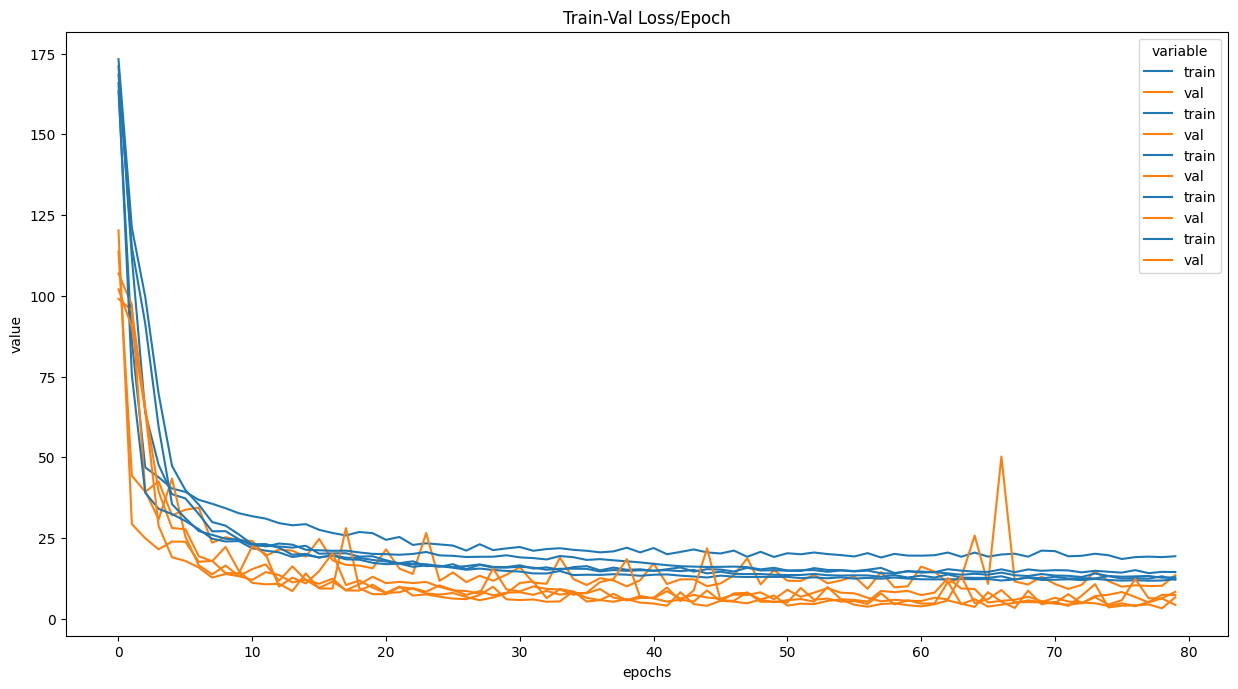

In [123]:
plt.figure(figsize=(15,8))

for i in range(5):
    sns.lineplot(data=losses[i], x = "epochs", y="value", hue="variable")
plt.title("Train-Val Loss/Epoch");

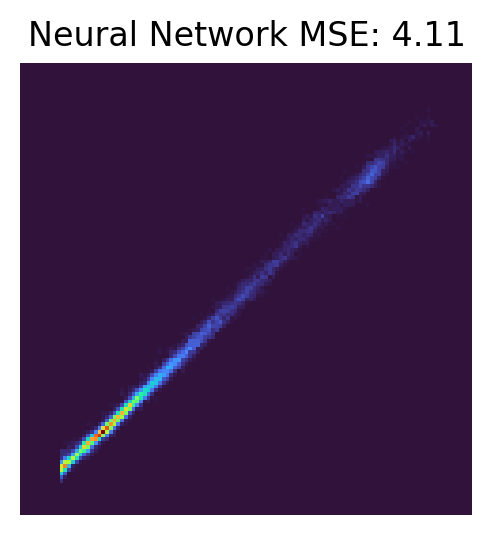

In [130]:
optimized_nn_model = optimized_nn_models[4]
optimized_nn_model.eval()
optimized_nn_out = optimized_nn_model(torch.Tensor(X_test)).detach().numpy();
plt.rcParams['figure.figsize'] = [3, 3]
plt.rcParams['figure.dpi'] = 200

plt.xlim([0, 120])
plt.ylim([0, 120])
helpers.heatmap(y_test, optimized_nn_out.squeeze(), title=f"Neural Network MSE: {metrics.mean_squared_error(y_test, optimized_nn_out.squeeze()):0.2f}", bin_num = 120, x_lim=[-10, 120], y_lim=[-10, 120], reverse=False);

